In [2]:
import matplotlib
matplotlib.use('Agg')

%load_ext autoreload
%autoreload 2

%matplotlib tk
%autosave 180
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import os

import glob2

# visualize results module
from Visualize import Visualize

# 
#data_dir = '/media/cat/4TBSSD/yuki/'
data_dir = '/media/cat/4TBSSD/yuki/'


labels = [
'left_paw',        # 0
'right_paw',       # 1
'nose',            # 2
'jaw',             # 3
'right_ear',       # 4
'tongue',          # 5
'lever',           # 6
'quiescence',      # 7
'code_04',         # 8
'code_04_lockout'  # 9
]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Autosaving every 180 seconds


In [4]:
##########################
####### INITIALIZE #######
##########################
# LEVER PULL
vis = Visualize()

# lever-related data
vis.main_dir = data_dir
vis.random_flag = False  # shuffle data to show baseline

# 
vis.window = 15
vis.lockout_window = 10
vis.lockout = False

vis.pca_var = 0.95
vis.pca_flag = True
vis.labels = labels

In [5]:
#####################################
######## LOAD DEFAULT PARAMS ########
#####################################
vis.significance = 0.05
vis.linewidth=10

#
vis.smooth_window = 10
vis.lockout = False
vis.xvalidation = 10
vis.sliding_window = 30

# 
vis.window = 15
vis.cbar_thick = 0.05
vis.alpha = 1.0
    
# 
vis.min_trials = 10

# 
vis.animal_id= 'IA1'
session = 'Feb1_'

vis.pickle=True

print ("   session: ", session)
vis.session_id = session
vis.cbar_offset = 0

############################

codes = ['left_paw','right_paw','jaw']
#code = 'left_paw'
cmaps = ['Reds_r',"Blues_r","Greens_r"]
clrs = ['red','blue','green']
vis.show_title=False
vis.show_legend=False
vis.legend_location = 2
vis.cbar=False
vis.show_EDT = False
vis.edt_offset = 0
vis.linewidth = 1

# alignment tools
vis.show_all_times = True
vis.shift_flag = True
vis.shift = 0

# 

   session:  Feb1_


In [6]:
#####################################################################################################
######## PLOT CORRELATION TRACES between lever and DLC traces for: left, right paw and lever ########
#####################################################################################################

# NOT PART OF FIGURES - USED FOR FIGURING OUT SHIFT BETWEEN DLC AND LEVER - DO NOT ERASE
# vis.animal_id = 'IJ2'

# sessions = np.loadtxt('/media/cat/4TBSSD/yuki/'+vis.animal_id+'/tif_files/sessions.txt',dtype='str')
# ctr=0
# labels = ['left_paw','right_paw','lever']
# fig=plt.figure()
# for session in sessions:
#     try:
#         data = np.load(session+'/correlate.npz',allow_pickle=True)
#         abspos = data['abspos_upsampled']
#         print (abspos.shape)
#         cor = data['cors'].squeeze().T
#         print ("cor: ", cor.shape)

#         ax=plt.subplot(7,10,ctr+1)
#         for k in range(3):
#             temp_trace = cor[:,k]
#             temp_trace[:2000] = 0
#             temp_trace[-2000:] = 0
#             temp_max = round(np.argmax(temp_trace)/1000. - 15.,2)
            
#             plt.plot(cor[:,k]/np.max(cor[:,k]),label=labels[k]+" "+str(temp_max))

#         plt.legend(fontsize=7)
        
#         plt.ylim(bottom=0)
#         plt.title(os.path.split(session)[1],fontsize=5)
#         ctr+=1
#         plt.xticks([])
#         plt.yticks(fontsize=6)
        
#     except:
#         pass
# plt.show()

(1300076,)
cor:  (30000, 3)
(1304776,)
cor:  (30000, 3)
(1306932,)
cor:  (30000, 3)
(1303307,)
cor:  (30000, 3)
(1304969,)
cor:  (30000, 3)
(1336966,)
cor:  (30000, 3)
(1312174,)
cor:  (30000, 3)
(1308409,)
cor:  (30000, 3)
(1323930,)
cor:  (30000, 3)
(1336053,)
cor:  (30000, 3)
(1300527,)
cor:  (30000, 3)


In [9]:
#####################################################################
###### VISUALIZE ALL SESSIONS: [Ca] aligned to SELECTED SHIFT #######
#####################################################################

# NOT PART OF FIGS; - SHOWS ALL SESSIONS OF SVM DECODING FOR A SINGLE ANIMAL

# '''  This code plots several features for all sessions from each mouse;
#     - for single session plot and EDT plots see below

# '''


# vis.animal_id= 'AQ2'

# fnames_good = '/media/cat/4TBSSD/yuki/'+vis.animal_id + '/tif_files/sessions_DLC_alignment_good.txt'

# import csv
# sessions = []
# shift_ids = []
# with open(fnames_good, newline='') as csvfile:
#     spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
#     for row in spamreader:
#         sessions.append(str(row[0]))
#         shift_ids.append(row[1])

# ############################
# fig = plt.figure()
# ctr_plt = 0
# vis.pickle = True
# vis.xvalidation = 10
# vis.sliding_window = 30
# vis.smooth_window = 10
# vis.min_trials = 10
# vis.alpha = 1
# vis.significance = 0.05
# vis.ctr_plot=0

# # 
# for sess in sessions:
#     session = os.path.split(sess)[1].replace(vis.animal_id+'pm_','').replace('_30Hz','').replace(vis.animal_id+'am_','').replace('week','').replace(',','')
#     vis.session_id = session
#     vis.cbar_offset = 0

#     vis.ax = plt.subplot(7,10,ctr_plt+1)
#     codes = ['left_paw','right_paw','jaw']
#     cmaps = ['Reds_r',"Blues_r","Greens_r"]
#     clrs = ['red','blue','green']
    
#     # 
#     vis.show_title=False
#     vis.show_legend=False
#     vis.legend_location = 2
#     vis.cbar=False             # THIS SHOWS colorbar
#     vis.show_EDT = False
#     vis.edt_offset = 0
#     vis.linewidth = 1

#     # alignment tools
#     vis.xlim = [-5, 5]
#     vis.shift_flag = True
#     vis.shift_id_str = shift_ids[ctr_plt]
    
#     # 
#     vis.plotted= False # flag to indicate at least 1 plot was made to increase visual plot value
#     vis.n_trials_plotting = []
#     for ctr,code in enumerate(codes):
#         vis.ctr = ctr
#         vis.code = code

#         vis.cbar_offset=0.05*ctr
#         vis.cmap = cmaps[ctr]
#         vis.title = vis.code
#         vis.title_offset = .35
#         vis.plot_significant(clrs[ctr],vis.code)
#         #vis.cbar=True

#         #vis.ax.set_xticks([])

#     if vis.plotted:
#         plt.title(session+ " " + str(vis.n_trials_plotting), fontsize=10)
#         vis.ctr_plot+=1

#     ctr_plt+=1
    
#     print ('')
#     print ('')
    
#     #if ctr_plt>=2:
#     #    break
        

In [13]:
#######################################################################
###### VISUALIZE SINGLE SESSION: [Ca] aligned to SELECTED SHIFT #######
#######################################################################

# FIG 3J - SVM PLOT EXAMPLES FOR 1 MOUSE DECODING SEVERAL BODY PARTS

'''  This code plots several features for all sessions from each mouse;
    - for multi session plot see above
'''

vis.animal_id= 'IJ2'         # Good mouse: IJ2 session Feb5_
vis.session_id = 'Feb5_'

# 
fnames_good = '/media/cat/4TBSSD/yuki/'+vis.animal_id + '/tif_files/sessions_DLC_alignment_good.txt'

import csv
sessions = []
shift_ids = []
with open(fnames_good, newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        sessions.append(str(row[0]))
        shift_ids.append(row[1])
print ("SESSIONS: ", sessions)

############################

labels = [
'left_paw',        # 0
'right_paw',       # 1
'nose',            # 2
'jaw',             # 3
'right_ear',       # 4
'tongue',          # 5
'lever',           # 6
'quiescence',      # 7
'code_04',         # 8
'code_04_lockout'  # 9
]

for id_ in range(8):

    vis.fig = plt.figure(figsize=(10,10))
    vis.ax = plt.subplot(1,1,1)

    ctr_plt = 0
    vis.pickle = True
    vis.xvalidation = 10
    vis.sliding_window = 30
    vis.smooth_window = 10
    vis.min_trials = 10
    vis.alpha = 1
    vis.significance = 0.05

    # 
    # session = 

    vis.cbar_offset = 0


    codes = labels[id_:id_+1]
    print ("CODES: ", codes)
    cmaps = ['Greys_r','Purples_r','Blues_r',"Greens_r","Reds_r",
             "Oranges_r","PuRd_r","PuBu_r",
            "YlGn_r","RdPu_r"]
    cmaps = cmaps[id_:id_+1]

    clrs = ['black','purple','blue','green','red','orange','darkred','darkgreen','lightgreen',
            'lightblue']
    clrs = clrs[id_:id_+1]

    # 
    vis.show_title=False
    vis.show_legend=False
    vis.legend_location = 2
    vis.cbar=False             # THIS SHOWS colorbar
    vis.show_EDT = True
    vis.edt_offset = 0
    vis.linewidth = 1

    # alignment tools
    vis.xlim = [-10, 0]
    vis.shift_flag = True
    vis.shift_id_str = shift_ids[ctr_plt]

    # 
    vis.plotted= False # flag to indicate at least 1 plot was made to increase visual plot value
    vis.n_trials_plotting = []
    edts = []
    for ctr,code in enumerate(codes):

        vis.ctr = ctr
        vis.code = code

        vis.cbar_offset=0.05*ctr
        vis.cmap = cmaps[ctr]
        vis.title = vis.code
        vis.title_offset = .35
        vis.plot_significant(clrs[ctr],vis.code)
        #vis.cbar=True

        #vis.ax.set_xticks([])

        edts.append(vis.earliest_continuous)
        print ('')
        print ('')
    #
    edts = np.array(edts)
    plt.suptitle(codes[0]+ " " + vis.session_id+ " " + str(vis.n_trials_plotting)+
              '\n EDTs: '+str(np.round(edts,2)), fontsize=15)


    # 
    if False:
        plt.savefig('/home/cat/'+codes[0]+'.png',dpi=300)
        plt.close()
    else:
        plt.show()
        #if ctr_plt>=2:
    #    break
        

SESSIONS:  ['Feb1_,', 'Feb2_,', 'Feb3_,', 'Feb4_,', 'Feb5_,', 'Feb9_,', 'Feb10_,', 'Feb11_,', 'Feb12_,', 'Feb15_,', 'Feb16_,']
CODES:  ['left_paw']
SET FNAME:  /media/cat/4TBSSD/yuki/IJ2/SVM_Scores/SVM_Scores_IJ2pm_Feb5_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
DATA;  (870, 10)
loaded lever offset:  80
SELF SHIFT ID:  2
 using shift:  2
SHIFT Loaded:  3.86
... DLC shift applied:  3.86
... LEVER OFFSET applied:  80
 rolled data:  (870, 10)
 post trials data size  (870, 10)
(861,)
self mean:  (300,)
self n trials:  125
self.data:  (300, 10)
Self sig save:  (300,)
data into multi-hypothesis tes: (300,)
Final sig:  (1, 300)
earliest:  180  in sec:  -4.0
vmin, vmax;  0.0 0.05 ticks:  [0.         0.01666667 0.03333333 0.05      ]
/media/cat/4TBSSD/yuki/IJ2/tif_files/IJ2pm_Feb5_30Hz/shift.txt


CODES:  ['right_paw']
SET FNAME:  /media/cat/4TBSSD/yuki/IJ2/SVM_Scores/SVM_Scores_IJ2pm_Feb5_30Hz_whole_stack_pca30Components_window15sec_X

In [42]:
#########################################################################
###### SCATTER PLOTS EDT FOR ALL MICE ALL SESSIONS ALL BODY PARTS #######
#########################################################################

# FIG 3K - Scatter plots of EDT
codes = [
'left_paw',          # 0
'right_paw',         # 1
'nose',              # 2
'jaw',               # 3
'right_ear',         # 4
'tongue',            # 5
# 'lever',           # 6
# 'quiescence',      # 7
# 'code_04',         # 8
# 'code_04_lockout'  # 9
]

vis.shift_flat = True
vis.pickle = True

animal_ids = ['IA1','IA2','IA3','IJ1','IJ2','AQ2']

# 
for animal_id in animal_ids: 
    vis.animal_id= animal_id

    # 
    fnames_good = '/media/cat/4TBSSD/yuki/'+vis.animal_id + '/tif_files/sessions_DLC_alignment_good.txt'

    import csv
    sessions = []
    shift_ids = []
    with open(fnames_good, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
        for row in spamreader:
            sessions.append(str(row[0]).replace(',',''))
            shift_ids.append(row[1])

    print ("SESSIONS: ", sessions)
    print ("SHIFT IDS: ", shift_ids)

    ############################

    #
    edt = []
    n_trials = []

    # loop over all sessions
    for ctr,session_id in enumerate(sessions):
        edt.append([])
        n_trials.append([])
        # get the shifted data by matching session ID with all sessions
        vis.session_id = session_id
        for k in range(len(sessions)):
            if vis.session_id in sessions[k]:
                ctr_plt = k
                break

        # loop over all limb movements
        vis.xlim = [-15, 0]
        for code in codes:

            vis.code = code
            vis.shift_id_str = shift_ids[ctr_plt]

            # GET FILENAME IF EXISTS
            vis.get_fname()
            if vis.fname is None:
                print ("no file, exiting")
                edt[ctr].append(np.nan)
                n_trials[ctr].append(0)
                continue

            # PROCESS SESSION
            vis.process_session()
            if vis.n_trials==0 or vis.data.shape[0]==0:
                print ("insufficient trials ", code)
                edt[ctr].append(np.nan)
                n_trials[ctr].append(0)
                continue

            # GET SIGNIFICANCE AND EDT
            vis.compute_significance()
            edt[ctr].append(vis.edt)
            n_trials[ctr].append(vis.n_trials)
            print ("*******************************")
            print ("    EDT: ", code, " ", vis.edt)
            print ("*******************************")
            print ('')
            print ('')

    n_trials = np.array(n_trials)
    edt = np.array(edt)
    print (edt.shape)
    
    # data_dir = '/media/cat/4TBSSD/yuki/'
    np.savez(data_dir + animal_id+"_edt_body_parts.npz",
            edt = edt,
            n_trials = n_trials)


SESSIONS:  ['Feb1_', 'Feb2_', 'Feb3_', 'Feb5_', 'Feb9_', 'Feb10_', 'Feb11_', 'Feb12_', 'Feb15_', 'Feb16_', 'Feb17_', 'Apr21_', 'Apr25_', 'Apr26_', 'Apr27_', 'Apr28_', 'Apr29_', 'May6_', 'May9_', 'May10_', 'May12_', 'May17_', 'May18_', 'May20_']
SHIFT IDS:  ['2', '1', '2', '2', '2', '2', '2', '0', '2', '2', '1', '0', '0', '1', '1', '1', '1', '2', '0', '2', '2', '2', '02', '0']
SET FNAME:  /media/cat/4TBSSD/yuki/IA1/SVM_Scores/SVM_Scores_IA1pm_Feb1_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  left_paw
Match code:  0
DATA;  (870, 10)
loaded lever offset:  77
SELF SHIFT ID:  2
 using shift:  2
SHIFT Loaded:  4.61
... DLC shift applied:  4.61
... LEVER OFFSET applied:  77
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  100
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  314  in sec:  -4.533333333333333

Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  372  in sec:  -2.6
 signianc n-trials:  73
*******************************
    EDT:  tongue   -2.6
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/IA1/SVM_Scores/SVM_Scores_IA1pm_Feb3_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  left_paw
Match code:  0
DATA;  (870, 10)
loaded lever offset:  61
SELF SHIFT ID:  2
 using shift:  2
SHIFT Loaded:  5.18
... DLC shift applied:  5.18
... LEVER OFFSET applied:  61
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  83
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  450  in sec:  0.0
 signianc n-trials:  83
*******************************
    EDT:  left_paw   0.0
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/IA1/SVM_Scores/SV

Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  356  in sec:  -3.1333333333333333
 signianc n-trials:  29
*******************************
    EDT:  tongue   -3.1333333333333333
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/IA1/SVM_Scores/SVM_Scores_IA1pm_Feb9_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  left_paw
Match code:  0
DATA;  (870, 10)
loaded lever offset:  70
SELF SHIFT ID:  2
 using shift:  2
SHIFT Loaded:  3.13
... DLC shift applied:  3.13
... LEVER OFFSET applied:  70
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  126
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  353  in sec:  -3.2333333333333334
 signianc n-trials:  126
*******************************
    EDT:  left_paw   -3.2333333333333334
**********************

self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  324  in sec:  -4.2
 signianc n-trials:  83
*******************************
    EDT:  tongue   -4.2
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/IA1/SVM_Scores/SVM_Scores_IA1pm_Feb11_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  left_paw
Match code:  0
DATA;  (870, 10)
loaded lever offset:  76
SELF SHIFT ID:  2
 using shift:  2
SHIFT Loaded:  4.92
... DLC shift applied:  4.92
... LEVER OFFSET applied:  76
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  150
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  254  in sec:  -6.533333333333333
 signianc n-trials:  150
*******************************
    EDT:  left_paw   -6.533333333333333
************

 post trials data size  (870, 10)
      n-trials:  87
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  330  in sec:  -4.0
 signianc n-trials:  87
*******************************
    EDT:  left_paw   -4.0
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/IA1/SVM_Scores/SVM_Scores_IA1pm_Feb15_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  right_paw
Match code:  1
DATA;  (870, 10)
loaded lever offset:  80
SELF SHIFT ID:  2
 using shift:  2
SHIFT Loaded:  4.4
... DLC shift applied:  4.4
... LEVER OFFSET applied:  80
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  100
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  364  in sec:  -2.8666666666666667
 signianc n-trials:  100
*********************

 post trials data size  (870, 10)
      n-trials:  127
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  363  in sec:  -2.9
 signianc n-trials:  127
*******************************
    EDT:  right_paw   -2.9
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/IA1/SVM_Scores/SVM_Scores_IA1pm_Feb17_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  nose
Match code:  2
DATA;  (870, 10)
loaded lever offset:  85
SELF SHIFT ID:  1
 using shift:  1
SHIFT Loaded:  5.16
... DLC shift applied:  5.16
... LEVER OFFSET applied:  85
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  61
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  299  in sec:  -5.033333333333333
 signianc n-trials:  61
************************

 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  89
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  335  in sec:  -3.8333333333333335
 signianc n-trials:  89
*******************************
    EDT:  left_paw   -3.8333333333333335
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/IA1/SVM_Scores/SVM_Scores_IA1pm_Apr25_Week3_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  right_paw
Match code:  1
DATA;  (870, 10)
loaded lever offset:  67
SELF SHIFT ID:  0
 using shift:  0
SHIFT Loaded:  4.21
... DLC shift applied:  4.21
... LEVER OFFSET applied:  67
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  87
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  362  in sec:  -2.9

self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  410  in sec:  -1.3333333333333333
 signianc n-trials:  70
*******************************
    EDT:  left_paw   -1.3333333333333333
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/IA1/SVM_Scores/SVM_Scores_IA1pm_Apr27_Week3_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  right_paw
Match code:  1
DATA;  (870, 10)
loaded lever offset:  81
SELF SHIFT ID:  1
 using shift:  1
SHIFT Loaded:  5.6
... DLC shift applied:  5.6
... LEVER OFFSET applied:  81
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  57
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  450  in sec:  0.0
 signianc n-trials:  57
*******************************
    EDT:  right_paw   0.0
******

(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  450  in sec:  0.0
 signianc n-trials:  100
*******************************
    EDT:  right_paw   0.0
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/IA1/SVM_Scores/SVM_Scores_IA1pm_Apr29_Week3_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  nose
Match code:  2
DATA;  (870, 10)
loaded lever offset:  81
SELF SHIFT ID:  1
 using shift:  1
SHIFT Loaded:  4.35
... DLC shift applied:  4.35
... LEVER OFFSET applied:  81
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  101
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  390  in sec:  -2.0
 signianc n-trials:  101
*******************************
    EDT:  nose   -2.0
*******************************



Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  450  in sec:  0.0
 signianc n-trials:  85
*******************************
    EDT:  nose   0.0
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/IA1/SVM_Scores/SVM_Scores_IA1am_May9_Week5_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  jaw
Match code:  3
DATA;  (870, 10)
loaded lever offset:  66
SELF SHIFT ID:  0
 using shift:  0
SHIFT Loaded:  4.84
... DLC shift applied:  4.84
... LEVER OFFSET applied:  66
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  35
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  358  in sec:  -3.066666666666667
 signianc n-trials:  35
*******************************
    EDT:  jaw   -3.066666666666667
*******************************


SET FNAME:  /media/cat/4TBSSD/

Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  450  in sec:  0.0
 signianc n-trials:  29
*******************************
    EDT:  jaw   0.0
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/IA1/SVM_Scores/SVM_Scores_IA1am_May12_Week5_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  right_ear
Match code:  4
DATA;  (870, 10)
loaded lever offset:  62
SELF SHIFT ID:  2
 using shift:  2
SHIFT Loaded:  3.41
... DLC shift applied:  3.41
... LEVER OFFSET applied:  62
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  72
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  442  in sec:  -0.26666666666666666
 signianc n-trials:  72
*******************************
    EDT:  right_ear   -0.26666666666666666
*******************************


SET FNAME:  /m

Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  351  in sec:  -3.3
 signianc n-trials:  90
*******************************
    EDT:  jaw   -3.3
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/IA1/SVM_Scores/SVM_Scores_IA1am_May18_Week6_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  right_ear
Match code:  4
DATA;  (870, 10)
loaded lever offset:  71
SELF SHIFT ID:  02
 using shift:  2.0
SHIFT Loaded:  5.12
... DLC shift applied:  5.12
... LEVER OFFSET applied:  71
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  109
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  351  in sec:  -3.3
 signianc n-trials:  109
*******************************
    EDT:  right_ear   -3.3
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/IA1/

Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  450  in sec:  0.0
 signianc n-trials:  80
*******************************
    EDT:  jaw   0.0
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/IA2/SVM_Scores/SVM_Scores_IA2pm_Feb1_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  right_ear
Match code:  4
DATA;  (870, 10)
loaded lever offset:  69
SELF SHIFT ID:  2
 using shift:  2
SHIFT Loaded:  4.08
... DLC shift applied:  4.08
... LEVER OFFSET applied:  69
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  34
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  450  in sec:  0.0
 signianc n-trials:  34
*******************************
    EDT:  right_ear   0.0
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/IA2/SVM_Scores/SVM_S

Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  405  in sec:  -1.5
 signianc n-trials:  106
*******************************
    EDT:  right_ear   -1.5
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/IA2/SVM_Scores/SVM_Scores_IA2pm_Feb3_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  tongue
Match code:  5
COULDNT FIND DATA
insufficient trials  tongue
SET FNAME:  /media/cat/4TBSSD/yuki/IA2/SVM_Scores/SVM_Scores_IA2pm_Feb4_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  left_paw
Match code:  0
DATA;  (870, 10)
loaded lever offset:  68
SELF SHIFT ID:  1
 using shift:  1
SHIFT Loaded:  3.84
... DLC shift applied:  3.84
... LEVER OFFSET applied:  68
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  138
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (45

... DLC shift applied:  3.28
... LEVER OFFSET applied:  67
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  111
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  243  in sec:  -6.9
 signianc n-trials:  111
*******************************
    EDT:  left_paw   -6.9
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/IA2/SVM_Scores/SVM_Scores_IA2pm_Feb9_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  right_paw
Match code:  1
DATA;  (870, 10)
loaded lever offset:  67
SELF SHIFT ID:  2
 using shift:  2
SHIFT Loaded:  3.28
... DLC shift applied:  3.28
... LEVER OFFSET applied:  67
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  112
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earl

Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  391  in sec:  -1.9666666666666666
 signianc n-trials:  109
*******************************
    EDT:  right_paw   -1.9666666666666666
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/IA2/SVM_Scores/SVM_Scores_IA2pm_Feb11_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  nose
Match code:  2
DATA;  (870, 10)
loaded lever offset:  85
SELF SHIFT ID:  2
 using shift:  2
SHIFT Loaded:  5.93
... DLC shift applied:  5.93
... LEVER OFFSET applied:  85
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  113
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  401  in sec:  -1.6333333333333333
 signianc n-trials:  113
*******************************
    EDT:  nose   -1.6333333333333333
*************************

Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  381  in sec:  -2.3
 signianc n-trials:  81
*******************************
    EDT:  jaw   -2.3
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/IA2/SVM_Scores/SVM_Scores_IA2pm_Feb16_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  right_ear
Match code:  4
DATA;  (870, 10)
loaded lever offset:  82
SELF SHIFT ID:  2
 using shift:  2
SHIFT Loaded:  4.36
... DLC shift applied:  4.36
... LEVER OFFSET applied:  82
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  73
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  370  in sec:  -2.6666666666666665
 signianc n-trials:  73
*******************************
    EDT:  right_ear   -2.6666666666666665
*******************************


SET FNAME:  /media/c

self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  333  in sec:  -3.9
 signianc n-trials:  121
*******************************
    EDT:  right_ear   -3.9
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/IA3/SVM_Scores/SVM_Scores_IA3pm_Feb1_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  tongue
Match code:  5
DATA;  (870, 10)
loaded lever offset:  74
SELF SHIFT ID:  2
 using shift:  2
SHIFT Loaded:  4.52
... DLC shift applied:  4.52
... LEVER OFFSET applied:  74
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  69
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  375  in sec:  -2.5
 signianc n-trials:  69
*******************************
    EDT:  tongue   -2.5
*******************************


SET FNAME:  /media/cat/4TBSS

Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  335  in sec:  -3.8333333333333335
 signianc n-trials:  96
*******************************
    EDT:  tongue   -3.8333333333333335
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/IA3/SVM_Scores/SVM_Scores_IA3pm_Feb4_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  left_paw
Match code:  0
DATA;  (870, 10)
loaded lever offset:  67
SELF SHIFT ID:  2
 using shift:  2
SHIFT Loaded:  3.91
... DLC shift applied:  3.91
... LEVER OFFSET applied:  67
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  132
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  206  in sec:  -8.133333333333333
 signianc n-trials:  132
*******************************
    EDT:  left_paw   -8.133333333333333
************************

Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  332  in sec:  -3.933333333333333
 signianc n-trials:  169
*******************************
    EDT:  tongue   -3.933333333333333
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/IA3/SVM_Scores/SVM_Scores_IA3pm_Feb10_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  left_paw
Match code:  0
DATA;  (870, 10)
loaded lever offset:  69
SELF SHIFT ID:  0
 using shift:  0
SHIFT Loaded:  4.26
... DLC shift applied:  4.26
... LEVER OFFSET applied:  69
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  116
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  250  in sec:  -6.666666666666667
 signianc n-trials:  116
*******************************
    EDT:  left_paw   -6.666666666666667
************************

DATA;  (870, 10)
loaded lever offset:  57
SELF SHIFT ID:  0
 using shift:  0
SHIFT Loaded:  3.52
... DLC shift applied:  3.52
... LEVER OFFSET applied:  57
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  155
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  183  in sec:  -8.9
 signianc n-trials:  155
*******************************
    EDT:  left_paw   -8.9
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/IA3/SVM_Scores/SVM_Scores_IA3pm_Feb12_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  right_paw
Match code:  1
DATA;  (870, 10)
loaded lever offset:  57
SELF SHIFT ID:  0
 using shift:  0
SHIFT Loaded:  3.52
... DLC shift applied:  3.52
... LEVER OFFSET applied:  57
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  125
(841,)
self mean:  (450,)
self.data: 

Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  332  in sec:  -3.933333333333333
 signianc n-trials:  114
*******************************
    EDT:  tongue   -3.933333333333333
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/IA3/SVM_Scores/SVM_Scores_IA3pm_Feb16_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  left_paw
Match code:  0
DATA;  (870, 10)
loaded lever offset:  72
SELF SHIFT ID:  2
 using shift:  2
SHIFT Loaded:  4.14
... DLC shift applied:  4.14
... LEVER OFFSET applied:  72
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  113
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  316  in sec:  -4.466666666666667
 signianc n-trials:  113
*******************************
    EDT:  left_paw   -4.466666666666667
************************

Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  330  in sec:  -4.0
 signianc n-trials:  168
*******************************
    EDT:  tongue   -4.0
*******************************


(11, 6)
SESSIONS:  ['Feb1_', 'Feb2_', 'Feb3_', 'Feb4_', 'Feb5_', 'Feb9_', 'Feb10_', 'Feb11_', 'Feb12_', 'Feb16_']
SHIFT IDS:  ['2', '0', '2', '2', '1', '2', '1', '2', '2', '2']
SET FNAME:  /media/cat/4TBSSD/yuki/IJ1/SVM_Scores/SVM_Scores_IJ1pm_Feb1_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  left_paw
Match code:  0
DATA;  (870, 10)
loaded lever offset:  86
SELF SHIFT ID:  2
 using shift:  2
SHIFT Loaded:  5.74
... DLC shift applied:  5.74
... LEVER OFFSET applied:  86
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  107
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  345  i

Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  327  in sec:  -4.1
 signianc n-trials:  101
*******************************
    EDT:  right_ear   -4.1
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/IJ1/SVM_Scores/SVM_Scores_IJ1pm_Feb2_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  tongue
Match code:  5
DATA;  (870, 10)
loaded lever offset:  71
SELF SHIFT ID:  0
 using shift:  0
SHIFT Loaded:  4.1
... DLC shift applied:  4.1
... LEVER OFFSET applied:  71
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  35
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  450  in sec:  0.0
 signianc n-trials:  35
*******************************
    EDT:  tongue   0.0
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/IJ1/SVM_Scores/SVM_

Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  343  in sec:  -3.566666666666667
 signianc n-trials:  110
*******************************
    EDT:  left_paw   -3.566666666666667
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/IJ1/SVM_Scores/SVM_Scores_IJ1pm_Feb5_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  right_paw
Match code:  1
DATA;  (870, 10)
loaded lever offset:  64
SELF SHIFT ID:  1
 using shift:  1
SHIFT Loaded:  4.45
... DLC shift applied:  4.45
... LEVER OFFSET applied:  64
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  116
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  333  in sec:  -3.9
 signianc n-trials:  116
*******************************
    EDT:  right_paw   -3.9
*******************************


SET FNAME:  /me

 post trials data size  (870, 10)
      n-trials:  130
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  336  in sec:  -3.8
 signianc n-trials:  130
*******************************
    EDT:  left_paw   -3.8
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/IJ1/SVM_Scores/SVM_Scores_IJ1pm_Feb10_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  right_paw
Match code:  1
DATA;  (870, 10)
loaded lever offset:  64
SELF SHIFT ID:  1
 using shift:  1
SHIFT Loaded:  3.74
... DLC shift applied:  3.74
... LEVER OFFSET applied:  64
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  112
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  251  in sec:  -6.633333333333334
 signianc n-trials:  112
******************

Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  296  in sec:  -5.133333333333334
 signianc n-trials:  125
*******************************
    EDT:  left_paw   -5.133333333333334
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/IJ1/SVM_Scores/SVM_Scores_IJ1pm_Feb12_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  right_paw
Match code:  1
DATA;  (870, 10)
loaded lever offset:  93
SELF SHIFT ID:  2
 using shift:  2
SHIFT Loaded:  4.94
... DLC shift applied:  4.94
... LEVER OFFSET applied:  93
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  95
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  275  in sec:  -5.833333333333333
 signianc n-trials:  95
*******************************
    EDT:  right_paw   -5.833333333333333
**********************

Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  339  in sec:  -3.7
 signianc n-trials:  91
*******************************
    EDT:  left_paw   -3.7
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/IJ2/SVM_Scores/SVM_Scores_IJ2pm_Feb1_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  right_paw
Match code:  1
DATA;  (870, 10)
loaded lever offset:  76
SELF SHIFT ID:  2
 using shift:  2
SHIFT Loaded:  3.73
... DLC shift applied:  3.73
... LEVER OFFSET applied:  76
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  94
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  336  in sec:  -3.8
 signianc n-trials:  94
*******************************
    EDT:  right_paw   -3.8
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/IJ2/SVM_Sco

Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  336  in sec:  -3.8
 signianc n-trials:  128
*******************************
    EDT:  left_paw   -3.8
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/IJ2/SVM_Scores/SVM_Scores_IJ2pm_Feb3_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  right_paw
Match code:  1
DATA;  (870, 10)
loaded lever offset:  67
SELF SHIFT ID:  2
 using shift:  2
SHIFT Loaded:  4.23
... DLC shift applied:  4.23
... LEVER OFFSET applied:  67
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  106
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  368  in sec:  -2.7333333333333334
 signianc n-trials:  106
*******************************
    EDT:  right_paw   -2.7333333333333334
*******************************


SET FNAME:  /

self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  337  in sec:  -3.7666666666666666
 signianc n-trials:  125
*******************************
    EDT:  left_paw   -3.7666666666666666
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/IJ2/SVM_Scores/SVM_Scores_IJ2pm_Feb5_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  right_paw
Match code:  1
DATA;  (870, 10)
loaded lever offset:  80
SELF SHIFT ID:  1
 using shift:  1
SHIFT Loaded:  4.63
... DLC shift applied:  4.63
... LEVER OFFSET applied:  80
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  107
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  342  in sec:  -3.6
 signianc n-trials:  107
*******************************
    EDT:  right_paw   -3.6
******

... LEVER OFFSET applied:  65
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  155
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  331  in sec:  -3.966666666666667
 signianc n-trials:  155
*******************************
    EDT:  right_ear   -3.966666666666667
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/IJ2/SVM_Scores/SVM_Scores_IJ2pm_Feb10_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  tongue
Match code:  5
DATA;  (870, 10)
loaded lever offset:  65
SELF SHIFT ID:  2
 using shift:  2
SHIFT Loaded:  3.95
... DLC shift applied:  3.95
... LEVER OFFSET applied:  65
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  80
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earlies

Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  329  in sec:  -4.033333333333333
 signianc n-trials:  172
*******************************
    EDT:  right_ear   -4.033333333333333
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/IJ2/SVM_Scores/SVM_Scores_IJ2pm_Feb12_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  tongue
Match code:  5
DATA;  (870, 10)
loaded lever offset:  73
SELF SHIFT ID:  2
 using shift:  2
SHIFT Loaded:  4.72
... DLC shift applied:  4.72
... LEVER OFFSET applied:  73
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  83
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  440  in sec:  -0.3333333333333333
 signianc n-trials:  83
*******************************
    EDT:  tongue   -0.3333333333333333
*************************

(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  450  in sec:  0.0
 signianc n-trials:  16
*******************************
    EDT:  left_paw   0.0
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/AQ2/SVM_Scores/SVM_Scores_AQ2am_Apr21_Week7_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  right_paw
Match code:  1
DATA;  (870, 10)
loaded lever offset:  63
SELF SHIFT ID:  2
 using shift:  2
SHIFT Loaded:  4.16
... DLC shift applied:  4.16
... LEVER OFFSET applied:  63
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  32
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  393  in sec:  -1.9
 signianc n-trials:  32
*******************************
    EDT:  right_paw   -1.9
***************************

... LEVER OFFSET applied:  58
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  34
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  314  in sec:  -4.533333333333333
 signianc n-trials:  34
*******************************
    EDT:  left_paw   -4.533333333333333
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/AQ2/SVM_Scores/SVM_Scores_AQ2am_Apr25_Week8_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  right_paw
Match code:  1
DATA;  (870, 10)
loaded lever offset:  58
SELF SHIFT ID:  2
 using shift:  2
SHIFT Loaded:  3.96
... DLC shift applied:  3.96
... LEVER OFFSET applied:  58
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  41
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
e

Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  350  in sec:  -3.3333333333333335
 signianc n-trials:  51
*******************************
    EDT:  right_paw   -3.3333333333333335
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/AQ2/SVM_Scores/SVM_Scores_AQ2am_Apr27_Week8_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  nose
Match code:  2
DATA;  (870, 10)
loaded lever offset:  64
SELF SHIFT ID:  2
 using shift:  2
SHIFT Loaded:  3.57
... DLC shift applied:  3.57
... LEVER OFFSET applied:  64
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  123
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  396  in sec:  -1.8
 signianc n-trials:  123
*******************************
    EDT:  nose   -1.8
*******************************


SET FNAME:  /med

Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  331  in sec:  -3.966666666666667
 signianc n-trials:  26
*******************************
    EDT:  left_paw   -3.966666666666667
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/AQ2/SVM_Scores/SVM_Scores_AQ2am_Apr29_Week8_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  right_paw
Match code:  1
DATA;  (870, 10)
loaded lever offset:  78
SELF SHIFT ID:  2
 using shift:  2
SHIFT Loaded:  4.07
... DLC shift applied:  4.07
... LEVER OFFSET applied:  78
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  77
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  292  in sec:  -5.266666666666667
 signianc n-trials:  77
*******************************
    EDT:  right_paw   -5.266666666666667
*****************

(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  450  in sec:  0.0
 signianc n-trials:  91
*******************************
    EDT:  right_paw   0.0
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/AQ2/SVM_Scores/SVM_Scores_AQ2am_Dec11_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  nose
Match code:  2
DATA;  (870, 10)
loaded lever offset:  65
SELF SHIFT ID:  1
 using shift:  1
SHIFT Loaded:  5.79
... DLC shift applied:  5.79
... LEVER OFFSET applied:  65
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  23
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  450  in sec:  0.0
 signianc n-trials:  23
*******************************
    EDT:  nose   0.0
*******************************


SET FNAME:

Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  361  in sec:  -2.966666666666667
 signianc n-trials:  86
*******************************
    EDT:  right_paw   -2.966666666666667
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/AQ2/SVM_Scores/SVM_Scores_AQ2am_Dec18_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  nose
Match code:  2
DATA;  (870, 10)
loaded lever offset:  81
SELF SHIFT ID:  2
 using shift:  2
SHIFT Loaded:  3.93
... DLC shift applied:  3.93
... LEVER OFFSET applied:  81
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  44
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  439  in sec:  -0.36666666666666664
 signianc n-trials:  44
*******************************
    EDT:  nose   -0.36666666666666664
****************************

SELF SHIFT ID:  1
 using shift:  1
SHIFT Loaded:  6.72
... DLC shift applied:  6.72
... LEVER OFFSET applied:  86
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  74
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  332  in sec:  -3.933333333333333
 signianc n-trials:  74
*******************************
    EDT:  right_paw   -3.933333333333333
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/AQ2/SVM_Scores/SVM_Scores_AQ2am_Dec29_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  nose
Match code:  2
DATA;  (870, 10)
loaded lever offset:  86
SELF SHIFT ID:  1
 using shift:  1
SHIFT Loaded:  6.72
... DLC shift applied:  6.72
... LEVER OFFSET applied:  86
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  137
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig 

 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  56
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  357  in sec:  -3.1
 signianc n-trials:  56
*******************************
    EDT:  right_ear   -3.1
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/AQ2/SVM_Scores/SVM_Scores_AQ2am_Feb2_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  tongue
Match code:  5
DATA;  (870, 10)
loaded lever offset:  72
SELF SHIFT ID:  2
 using shift:  2
SHIFT Loaded:  4.09
... DLC shift applied:  4.09
... LEVER OFFSET applied:  72
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  70
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  354  in sec:  -3.2
 signianc n-trials:  70
**************

Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  306  in sec:  -4.8
 signianc n-trials:  97
*******************************
    EDT:  tongue   -4.8
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/AQ2/SVM_Scores/SVM_Scores_AQ2am_Feb5_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  left_paw
Match code:  0
DATA;  (870, 10)
loaded lever offset:  89
SELF SHIFT ID:  2
 using shift:  2
SHIFT Loaded:  5.11
... DLC shift applied:  5.11
... LEVER OFFSET applied:  89
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  78
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  269  in sec:  -6.033333333333333
 signianc n-trials:  78
*******************************
    EDT:  left_paw   -6.033333333333333
*******************************


SET FNAME:  /media/cat

Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  128  in sec:  -10.733333333333333
 signianc n-trials:  92
*******************************
    EDT:  right_paw   -10.733333333333333
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/AQ2/SVM_Scores/SVM_Scores_AQ2am_Feb10_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  nose
Match code:  2
DATA;  (870, 10)
loaded lever offset:  63
SELF SHIFT ID:  2
 using shift:  2
SHIFT Loaded:  3.86
... DLC shift applied:  3.86
... LEVER OFFSET applied:  63
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  122
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  309  in sec:  -4.7
 signianc n-trials:  122
*******************************
    EDT:  nose   -4.7
*******************************


SET FNAME:  /media/cat

(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  450  in sec:  0.0
 signianc n-trials:  36
*******************************
    EDT:  nose   0.0
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/AQ2/SVM_Scores/SVM_Scores_AQ2am_Feb12_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  jaw
Match code:  3
COULDNT FIND DATA
insufficient trials  jaw
SET FNAME:  /media/cat/4TBSSD/yuki/AQ2/SVM_Scores/SVM_Scores_AQ2am_Feb12_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  right_ear
Match code:  4
DATA;  (870, 10)
loaded lever offset:  85
SELF SHIFT ID:  2
 using shift:  2
SHIFT Loaded:  5.15
... DLC shift applied:  5.15
... LEVER OFFSET applied:  85
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  34
(841,)
self mean:  (450,)
self.

(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  450  in sec:  0.0
 signianc n-trials:  18
*******************************
    EDT:  jaw   0.0
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/AQ2/SVM_Scores/SVM_Scores_AQ2am_Feb16_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  right_ear
Match code:  4
DATA;  (870, 10)
loaded lever offset:  85
SELF SHIFT ID:  1
 using shift:  1
SHIFT Loaded:  5.51
... DLC shift applied:  5.51
... LEVER OFFSET applied:  85
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  39
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  342  in sec:  -3.6
 signianc n-trials:  39
*******************************
    EDT:  right_ear   -3.6
*******************************


SET 

 post trials data size  (870, 10)
      n-trials:  126
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  309  in sec:  -4.7
 signianc n-trials:  126
*******************************
    EDT:  right_paw   -4.7
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/AQ2/SVM_Scores/SVM_Scores_AQ2am_Jan5_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  nose
Match code:  2
DATA;  (870, 10)
loaded lever offset:  52
SELF SHIFT ID:  1
 using shift:  1
SHIFT Loaded:  3.24
... DLC shift applied:  3.24
... LEVER OFFSET applied:  52
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  129
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  291  in sec:  -5.3
 signianc n-trials:  129
*******************************
    E

Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  254  in sec:  -6.533333333333333
 signianc n-trials:  157
*******************************
    EDT:  right_paw   -6.533333333333333
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/AQ2/SVM_Scores/SVM_Scores_AQ2am_Jan7_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  nose
Match code:  2
DATA;  (870, 10)
loaded lever offset:  90
SELF SHIFT ID:  2
 using shift:  2
SHIFT Loaded:  6.59
... DLC shift applied:  6.59
... LEVER OFFSET applied:  90
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  139
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  271  in sec:  -5.966666666666667
 signianc n-trials:  139
*******************************
    EDT:  nose   -5.966666666666667
******************************

 post trials data size  (870, 10)
      n-trials:  133
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  205  in sec:  -8.166666666666666
 signianc n-trials:  133
*******************************
    EDT:  right_paw   -8.166666666666666
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/AQ2/SVM_Scores/SVM_Scores_AQ2am_Jan13_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  nose
Match code:  2
DATA;  (870, 10)
loaded lever offset:  87
SELF SHIFT ID:  2
 using shift:  2
SHIFT Loaded:  5.76
... DLC shift applied:  5.76
... LEVER OFFSET applied:  87
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  131
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  118  in sec:  -11.066666666666666
 signianc n-trials

Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  358  in sec:  -3.066666666666667
 signianc n-trials:  117
*******************************
    EDT:  right_paw   -3.066666666666667
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/AQ2/SVM_Scores/SVM_Scores_AQ2am_Jan15_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  nose
Match code:  2
DATA;  (870, 10)
loaded lever offset:  93
SELF SHIFT ID:  2
 using shift:  2
SHIFT Loaded:  5.99
... DLC shift applied:  5.99
... LEVER OFFSET applied:  93
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  77
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  373  in sec:  -2.566666666666667
 signianc n-trials:  77
*******************************
    EDT:  nose   -2.566666666666667
*******************************

Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  450  in sec:  0.0
 signianc n-trials:  83
*******************************
    EDT:  right_paw   0.0
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/AQ2/SVM_Scores/SVM_Scores_AQ2am_Jan19_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  nose
Match code:  2
DATA;  (870, 10)
loaded lever offset:  69
SELF SHIFT ID:  0
 using shift:  0
SHIFT Loaded:  5.86
... DLC shift applied:  5.86
... LEVER OFFSET applied:  69
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  155
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  357  in sec:  -3.1
 signianc n-trials:  155
*******************************
    EDT:  nose   -3.1
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/AQ2/SVM_Scores/SVM_

Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  365  in sec:  -2.8333333333333335
 signianc n-trials:  131
*******************************
    EDT:  right_paw   -2.8333333333333335
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/AQ2/SVM_Scores/SVM_Scores_AQ2am_Jan22_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  nose
Match code:  2
DATA;  (870, 10)
loaded lever offset:  87
SELF SHIFT ID:  0
 using shift:  0
SHIFT Loaded:  4.67
... DLC shift applied:  4.67
... LEVER OFFSET applied:  87
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  148
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  322  in sec:  -4.266666666666667
 signianc n-trials:  148
*******************************
    EDT:  nose   -4.266666666666667
***************************

Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  301  in sec:  -4.966666666666667
 signianc n-trials:  107
*******************************
    EDT:  right_paw   -4.966666666666667
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/AQ2/SVM_Scores/SVM_Scores_AQ2am_Jan29_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  nose
Match code:  2
DATA;  (870, 10)
loaded lever offset:  94
SELF SHIFT ID:  1
 using shift:  1
SHIFT Loaded:  5.64
... DLC shift applied:  5.64
... LEVER OFFSET applied:  94
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  87
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  315  in sec:  -4.5
 signianc n-trials:  87
*******************************
    EDT:  nose   -4.5
*******************************


SET FNAME:  /media/cat/4T

Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  329  in sec:  -4.033333333333333
 signianc n-trials:  105
*******************************
    EDT:  right_paw   -4.033333333333333
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/AQ2/SVM_Scores/SVM_Scores_AQ2pm_Dec17_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  nose
Match code:  2
DATA;  (870, 10)
loaded lever offset:  66
SELF SHIFT ID:  2
 using shift:  2
SHIFT Loaded:  3.41
... DLC shift applied:  3.41
... LEVER OFFSET applied:  66
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  75
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  450  in sec:  0.0
 signianc n-trials:  75
*******************************
    EDT:  nose   0.0
*******************************


SET FNAME:  /media/cat/4TBS

... LEVER OFFSET applied:  68
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  119
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  280  in sec:  -5.666666666666667
 signianc n-trials:  119
*******************************
    EDT:  right_paw   -5.666666666666667
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/AQ2/SVM_Scores/SVM_Scores_AQ2pm_Jan13_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  nose
Match code:  2
DATA;  (870, 10)
loaded lever offset:  68
SELF SHIFT ID:  2
 using shift:  2
SHIFT Loaded:  2.94
... DLC shift applied:  2.94
... LEVER OFFSET applied:  68
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  109
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest

Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  209  in sec:  -8.033333333333333
 signianc n-trials:  134
*******************************
    EDT:  left_paw   -8.033333333333333
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/AQ2/SVM_Scores/SVM_Scores_AQ2pm_Jan15_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  right_paw
Match code:  1
DATA;  (870, 10)
loaded lever offset:  83
SELF SHIFT ID:  2
 using shift:  2
SHIFT Loaded:  4.17
... DLC shift applied:  4.17
... LEVER OFFSET applied:  83
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  130
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  313  in sec:  -4.566666666666666
 signianc n-trials:  130
*******************************
    EDT:  right_paw   -4.566666666666666
********************

 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  112
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  363  in sec:  -2.9
 signianc n-trials:  112
*******************************
    EDT:  left_paw   -2.9
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/AQ2/SVM_Scores/SVM_Scores_AQ2pm_Jan20_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  right_paw
Match code:  1
DATA;  (870, 10)
loaded lever offset:  83
SELF SHIFT ID:  2
 using shift:  2
SHIFT Loaded:  4.2
... DLC shift applied:  4.2
... LEVER OFFSET applied:  83
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  121
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  420  in sec:  -1.0
 signianc n-trials:  121
*********

Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  314  in sec:  -4.533333333333333
 signianc n-trials:  133
*******************************
    EDT:  right_paw   -4.533333333333333
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/AQ2/SVM_Scores/SVM_Scores_AQ2pm_Jan22_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  nose
Match code:  2
DATA;  (870, 10)
loaded lever offset:  85
SELF SHIFT ID:  1
 using shift:  1
SHIFT Loaded:  4.87
... DLC shift applied:  4.87
... LEVER OFFSET applied:  85
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  152
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  349  in sec:  -3.3666666666666667
 signianc n-trials:  152
*******************************
    EDT:  nose   -3.3666666666666667
***************************

Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  408  in sec:  -1.4
 signianc n-trials:  105
*******************************
    EDT:  nose   -1.4
*******************************


SET FNAME:  /media/cat/4TBSSD/yuki/AQ2/SVM_Scores/SVM_Scores_AQ2pm_Jan27_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  jaw
Match code:  3
COULDNT FIND DATA
insufficient trials  jaw
SET FNAME:  /media/cat/4TBSSD/yuki/AQ2/SVM_Scores/SVM_Scores_AQ2pm_Jan27_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
self.code:  right_ear
Match code:  4
DATA;  (870, 10)
loaded lever offset:  76
SELF SHIFT ID:  1
 using shift:  1
SHIFT Loaded:  4.38
... DLC shift applied:  4.38
... LEVER OFFSET applied:  76
 rolled data:  (870, 10)
 post trials data size  (870, 10)
      n-trials:  82
(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data 

(841,)
self mean:  (450,)
self.data:  (450, 10)
Self sig save:  (450,)
data into multi-hypothesis tes: (450,)
Final sig:  (1, 450)
earliest:  340  in sec:  -3.6666666666666665
 signianc n-trials:  61
*******************************
    EDT:  tongue   -3.6666666666666665
*******************************


(53, 6)


In [70]:
##############################
### GENERATE SCATTER PLOT ####
##############################

# FIG 3K - Scatter plots of EDT
clrs = ['black','purple','blue','green','red','orange']

# 
animal_id = 'AQ2'
data = np.load('/media/cat/4TBSSD/yuki/'+animal_id+'_edt_body_parts.npz')
edt = data['edt']
n_trials = data['n_trials']

#
fig = plt.figure(figsize=(10,20))
for k in range(edt.shape[1]):
    ax=plt.subplot(2,3,k+1)
    
    idx = np.where(np.logical_and(edt[:,k]!=0,np.isnan(edt[:,k])==False))[0]
    t = np.array(n_trials[idx,k])
    temp = np.array(edt[idx,k])
    
    # 
    plt.scatter(temp,t,c=clrs[k],
               s=500,edgecolor='black',alpha=1-np.arange(temp.shape[0])/temp.shape[0])
    
    # 
    coef = np.polyfit(temp,t,1)
    poly1d_fn = np.poly1d(coef) 
    plt.plot(temp, poly1d_fn(temp), c='black',
            linewidth=5,alpha=.5)    

    # 
    plt.xlim(-15,0)
    plt.ylim(0,200)
    plt.title(codes[k])
    plt.xticks([])
    plt.yticks([])
    
if True:
    plt.savefig('/home/cat/scatters_bpodies.png',dpi=300)
    plt.close()
else:
    plt.show()
    



(53, 6)


In [103]:
###########################################################
### VERTICAL HISTOGRAMS ALL BODY MOVEMENTS ALL ANIMALS ####
###########################################################

animal_ids = ['IA1','IA2','IA3','IJ1','IJ2','AQ2']
clrs = ['black','purple','blue','green','red','orange']

# 
code_ids = [3,5]

# 
from Visualize import plot_vertical_histograms
window = 15

# 
plot_vertical_histograms(animal_ids,
                        code_ids,
                        clrs,
                        window,
                         labels,
                        -10.0)

plt.savefig('/home/cat/'+str(code_ids)+'.png',dpi=300)
plt.close()
# 
    

IJ1 session 2 with EDT < threshold:  [6]
AQ2 session 1 with EDT < threshold:  [4]
AQ2 session 2 with EDT < threshold:  [30 44]


In [77]:
fname = '/media/cat/4TBSSD/yuki/AQ2_edt_body_parts.npz'
data = np.load(fname, allow_pickle=True)

edt = data['edt']
print (edt.shape)

(53, 6)


In [12]:
# ###########################################
# ###### VISUALIZE EDT FOR BODY PARTS #######
# ###########################################

# # FIG 3J: EDT FOR BODY PART EXAMPLES
# # '''      
# #     - Fig 3J
# # '''

# vis.animal_id= 'IJ2'
# vis.session_id = 'Feb5_'

# # 
# fnames_good = '/media/cat/4TBSSD/yuki/'+vis.animal_id + '/tif_files/sessions_DLC_alignment_good.txt'

# import csv
# sessions = []
# shift_ids = []
# with open(fnames_good, newline='') as csvfile:
#     spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
#     for row in spamreader:
#         sessions.append(str(row[0]))
#         shift_ids.append(row[1])
# print ("SESSIONS: ", sessions)

# ############################
# ############################
# ############################

# labels = [
# 'left_paw',        # 0
# 'right_paw',       # 1
# 'nose',            # 2
# 'jaw',             # 3
# 'right_ear',       # 4
# 'tongue',          # 5
# 'lever',           # 6
# 'quiescence',      # 7
# 'code_04',         # 8
# 'code_04_lockout'  # 9
# ]

# for id_ in range(8):

#     vis.fig = plt.figure(figsize=(10,10))
#     vis.ax = plt.subplot(1,1,1)

#     ctr_plt = 0
#     vis.pickle = True
#     vis.xvalidation = 10
#     vis.sliding_window = 30
#     vis.smooth_window = 10
#     vis.min_trials = 10
#     vis.alpha = 1
#     vis.significance = 0.05

#     # 
#     # session = 

#     vis.cbar_offset = 0


#     codes = labels[id_:id_+1]
#     print ("CODES: ", codes)
#     cmaps = ['Greys_r','Purples_r','Blues_r',"Greens_r","Reds_r",
#              "Oranges_r","PuRd_r","PuBu_r",
#             "YlGn_r","RdPu_r"]
#     cmaps = cmaps[id_:id_+1]

#     clrs = ['black','purple','blue','green','red','orange','darkred','darkgreen','lightgreen',
#             'lightblue']
#     clrs = clrs[id_:id_+1]

#     # 
#     vis.show_title=False
#     vis.show_legend=False
#     vis.legend_location = 2
#     vis.cbar=False             # THIS SHOWS colorbar
#     vis.show_EDT = True
#     vis.edt_offset = 0
#     vis.linewidth = 1

#     # alignment tools
#     vis.xlim = [-10, 10]
#     vis.shift_flag = True
#     vis.shift_id_str = shift_ids[ctr_plt]

#     # 
#     vis.plotted= False # flag to indicate at least 1 plot was made to increase visual plot value
#     vis.n_trials_plotting = []
#     edts = []
#     for ctr,code in enumerate(codes):

#         vis.ctr = ctr
#         vis.code = code

#         vis.cbar_offset=0.05*ctr
#         vis.cmap = cmaps[ctr]
#         vis.title = vis.code
#         vis.title_offset = .35
#         vis.plot_significant(clrs[ctr],vis.code)
#         #vis.cbar=True

#         #vis.ax.set_xticks([])

#         edts.append(vis.earliest_continuous)
#         print ('')
#         print ('')
#     #
#     edts = np.array(edts)
#     plt.suptitle(codes[0]+ " " + vis.session_id+ " " + str(vis.n_trials_plotting)+
#               '\n EDTs: '+str(np.round(edts,2)), fontsize=15)

#     # 
#     if False:
#         plt.savefig('/home/cat/'+codes[0]+'.png',dpi=300)
#         plt.close()
#     else:
#         plt.show()
#         #if ctr_plt>=2:
#     #    break
        

SESSIONS:  ['Feb1_,', 'Feb2_,', 'Feb3_,', 'Feb4_,', 'Feb5_,', 'Feb9_,', 'Feb10_,', 'Feb11_,', 'Feb12_,', 'Feb15_,', 'Feb16_,']
CODES:  ['left_paw']
SET FNAME:  /media/cat/4TBSSD/yuki/IJ2/SVM_Scores/SVM_Scores_IJ2pm_Feb5_30Hz_whole_stack_pca30Components_window15sec_Xvalid10_Slidewindow30Frames_accuracy.pk
PICKLE DATA:  10
DATA;  (870, 10)
loaded lever offset:  80
SELF SHIFT ID:  2
 using shift:  2
SHIFT Loaded:  3.86
... DLC shift applied:  3.86
... LEVER OFFSET applied:  80
 rolled data:  (870, 10)
 post trials data size  (870, 10)
(861,)
self mean:  (600,)
self n trials:  125
self.data:  (600, 10)
Self sig save:  (600,)
data into multi-hypothesis tes: (600,)
Final sig:  (1, 600)
earliest:  600  in sec:  0.0
vmin, vmax;  0.0 0.05 ticks:  [0.         0.01666667 0.03333333 0.05      ]
/media/cat/4TBSSD/yuki/IJ2/tif_files/IJ2pm_Feb5_30Hz/shift.txt


CODES:  ['right_paw']
SET FNAME:  /media/cat/4TBSSD/yuki/IJ2/SVM_Scores/SVM_Scores_IJ2pm_Feb5_30Hz_whole_stack_pca30Components_window15sec_Xv

In [11]:
#####################################
####### PLOT PREDICTOIN TRENDS ######
#####################################

def compute_significance(data,
                         significance):

        #print ("self.data: ", data.shape)
        
        mean = data.mean(1)
        #
        sig = []
        for k in range(data.shape[0]):
            #res = stats.ks_2samp(self.data[k],
            #                     control)
            #res = stats.ttest_ind(first, second, axis=0, equal_var=True)

            #
            res = scipy.stats.ttest_1samp(data[k], 0.5)

            sig.append(res[1])


        sig_save = np.array(sig).copy()
        #print ("Self sig save: ", sig_save.shape)

        # multiple hypothesis test
        temp = np.array(sig)
        #print ("data into multi-hypothesis tes:", temp.shape)
        temp2 = multipletests(temp, alpha=significance, method='fdr_bh')
        sig = temp2[1]

        #
        sig=np.array(sig)[None]

        #
        thresh = significance
        idx = np.where(sig>thresh)
        sig[idx] = np.nan

        #
        idx = np.where(mean<0.5)
        sig[:,idx] = np.nan
        #print ("SIG: ", sig.shape)

        # find earliest 
        earliest_continuous = 0
        for k in range(sig.shape[1]-1,0,-1):
            if sig[0][k]<=significance:
                earliest_continuous = k
            else:
                break
                
        earliest_continuous = -(sig.shape[1]-earliest_continuous)/30.
                
        return sig, earliest_continuous
        
        
names = ['IA1','IA2','IA3','IJ1','IJ2', 'AQ2']

fig, ax = plt.subplots()
import scipy
from statsmodels.stats.multitest import multipletests

smooth = True
smooth_window = 6
significance = 0.05
auc = []
early = []
from tqdm import tqdm, trange
for k, name in enumerate(names):
    fnames = np.loadtxt('/media/cat/4TBSSD/yuki/'+name+'/concatenated_svm.txt',dtype='str') #[::-1]

    ax=plt.subplot(2,3,k+1)
    colors = plt.cm.viridis(np.linspace(0,1,len(fnames)))

    auc.append([])
    early.append([])
    for ctr,fname in tqdm(enumerate(fnames)):

        data = np.load(fname, allow_pickle=True)
        acc = data['accuracy']

        if smooth:            
            data = []
            for p in range(acc.shape[1]):
                box = np.ones(smooth_window)/smooth_window
                trace_smooth = np.convolve(acc[:,p], 
                                           box, 
                                           mode='valid')

                data.append(trace_smooth)
            data = np.array(data)
            acc = np.array(data).copy().T

        # 
        mean = acc.mean(1)

        t = np.arange(mean.shape[0])/30-29
        ax.plot(t,mean,
                linewidth=2,
                color=colors[ctr])
    
        # append area under cruve up to t = -10sec
        #print (mean.shape)
        temp = mean[-300:]  # last 10sec prior to movement
        auc[k].append(temp.sum())
        
        sig, earliest = compute_significance(data.T,
                                             significance)
        early[k].append(earliest)
        
    plt.ylim(0.4,1.0)
    plt.xlim(-15,0)
    plt.plot([-30,0],[0.5,0.5],'--',c='black')


36it [00:11,  3.13it/s]


KeyboardInterrupt: 

In [268]:
#########################################
########### AUC AND EARLY PLOTS #########
#########################################

# fig2=plt.figure()
# for k in range(len(auc)):
#     plt.plot(auc[k], label=names[k],
#             linewidth=4)
# plt.legend(fontsize=20)

colors = ['black','blue','red','green','magenta','pink','cyan']
ids= ["M1","M2","M3","M4","M5","M6",]
fig2=plt.figure()
for k in range(len(early)):
    temp = np.array(early[k])
    idx =np.where(temp<-20)[0]
    temp[idx]=temp[idx-1]
    t = np.arange(temp.shape[0])
    
    #
    temp2 = np.poly1d(np.polyfit(t, temp, 1))(t)
    plt.plot(t, temp2,
             linewidth=6,
             label=ids[k]+ " ***** ",

             c=colors[k])

    # 
    corr = scipy.stats.pearsonr(t,temp2)
        
    plt.scatter(t,
                temp, 
                #label=names[k]+ " "+str(round(corr[0],2))+
                #                        " ("+str("pval: {0:.1}".format(corr[1]))+")",
                s=100,
                linewidth=4,
                c=colors[k],
                alpha=.3)
    #t = np.arange(auc1.shape[0])/(auc1.shape[0]-1)


#
plt.xlim(0,80)
plt.ylim(-12,0)
plt.legend(fontsize=20)
plt.show()


In [196]:
#############################################################
### COMPUTE DISTRIBUTION OF FIRST SIG DECODING ALL ANIMALS ##
#############################################################
from tqdm import trange

# lever-related data
vis.main_dir = data_dir
vis.random_flag = False  # shuffle data to show baseline

# 
vis.window = 30
vis.lockout_window = 10
vis.code = 'code_04'
vis.lockout = False
vis.imaging_rate = 30.
vis.pca_var = 0.95
vis.pca_flag = True
vis.xvalidation = 10
vis.sliding_window = 30

# 
vis.smooth_window = 30
vis.min_trials = 20

#
vis.significance=1E-2

# if already computed
if False:
    #lockouts = [False, True]
    lockouts = [False]
    vis.compute_first_decoding_time(lockouts)

# if already computed
if True:
    #lockouts = [False, True]
    lockouts = [False]
    vis.compute_first_decoding_time_concatenated(lockouts)



  0%|          | 0/6 [00:00<?, ?it/s]

 ... data missing /media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb1_30Hz/IA1pm_Feb1_30Hz_globalPca_min_trials_concatenated200_code_04_30sec_accuracy.npz
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
 ... data missing /media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb4_30Hz/IA1pm_Feb4_30Hz_globalPca_min_trials_concatenated200_code_04_30sec_accuracy.npz
 ... data missing /media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb5_30Hz/IA1pm_Feb5_30Hz_globalPca_min_trials_concatenated200_code_04_30sec_accuracy.npz
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  

Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
 ... data missing /media/cat/4TBSSD/yuki/IA1/tif_files/IA1am_May13_Week5_30Hz/IA1am_May13_Week5_30Hz_globalPca_min_trials_concatenated200_code_04_30sec_accuracy.npz
 ... data missing /media/cat/4TBSSD/yuki/IA1/tif_files/IA1am_May16_Week6_30Hz/IA1am_May16_Week6_30Hz_globalPca_min_trials_concatenated200_code_04_30sec_accuracy.npz
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data in

 17%|█▋        | 1/6 [00:17<01:28, 17.70s/it]

Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
 ... data missing /media/cat/4TBSSD/yuki/IA2/tif_files/IA2pm_Feb1_30Hz/IA2pm_Feb1_30Hz_globalPca_min_trials_concatenated200_code_04_30sec_accuracy.npz
 ... data missing /media/cat/4TBSSD/yuki/IA2/tif_files/IA2pm_Feb2_30Hz/IA2pm_Feb2_30Hz_globalPca_min_trials_concatenated200_code_04_30sec_accuracy.npz
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
 ... data missing /media/cat/4TBSSD/yuki/IA2/tif_files/IA2pm_Feb9_30Hz/IA2pm_Feb9_30Hz_globalPca_min_trials_concatenated200_code_04_30sec_accuracy.npz
 ... data missing /media/cat/4TBSSD/yuki/IA2/tif_files/IA2pm_Feb10_30Hz/IA2pm_Fe

 33%|███▎      | 2/6 [00:28<00:54, 13.63s/it]

Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
 ... data missing /media/cat/4TBSSD/yuki/IA3/tif_files/IA3pm_Feb10_30Hz/IA3pm_Feb10_30Hz_globalPca_min_trials_concatenated200_code_04_30sec_accuracy.npz
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 8

 50%|█████     | 3/6 [00:41<00:40, 13.53s/it]

Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10

 67%|██████▋   | 4/6 [00:54<00:26, 13.35s/it]

Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
 ... data missing /media/cat/4TBSSD/yuki/IJ1/tif_files/IJ1pm_Apr7_30Hz/IJ1pm_Apr7_30Hz_globalPca_min_trials_concatenated200_code_04_30sec_accuracy.npz
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
 ... data missing /media/cat/4TBSSD/yuki/IJ2/tif_files/IJ2pm_Feb9_30Hz/IJ2pm_Feb9_30Hz_globalPca_min_trials_concatenated200_co

 83%|████████▎ | 5/6 [01:07<00:13, 13.14s/it]

Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
 ... data missing /media/cat/4TBSSD/yuki/AQ2/tif_files/AQ2am_Dec9_30Hz/AQ2am_Dec9_30Hz_globalPca_min_trials_concatenated200_code_04_30sec_accuracy.npz
 ... data missing /media/cat/4TBSSD/yuki/AQ2/tif_files/AQ2am_Dec10_30Hz/AQ2am_Dec10_30Hz_globalPca_min_trials_concatenated200_code_04_30sec_accuracy.npz
 ... data missing /media/cat/4TBSSD/yuki/AQ2/tif_files/AQ2pm_Dec10_30Hz/AQ2pm_Dec10_30Hz_globalPca_min_trials_concatenated200_code_04_30sec_accuracy.npz
 ... data missing /media/cat/4TBSSD/yuki/AQ2/tif_files/AQ2am_Dec11_30Hz/AQ2am_Dec11_30Hz_globalPca_min_trials_concatenated200_code_04_30sec_accuracy.npz
 ... data missing /media/cat/4TBSSD/yuki/AQ2/tif_files/AQ2pm_Dec14_30Hz/AQ2pm_Dec14_30Hz_globalPca_min_trials_concatenated200_code_04_30sec_accuracy.npz
 ... data missing /media/cat/4TBSSD/yuki/AQ2/tif_files/AQ2am_Dec14_30Hz/AQ2am_Dec14_30Hz_globalPca_min_trials_concatenated200_code_04_30sec_accuracy.npz
L

Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10

100%|██████████| 6/6 [01:33<00:00, 15.56s/it]

Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)



/media/cat/4TBSSD/anaconda3/envs/wide/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


In [209]:
#############################################################
#### PLOT DISTRIBUTION OF FIRST SIG DECODING ALL ANIMALS ####
#############################################################

# return all session ids that can be predicted longer than this:
return_ids_threshold = -10

vis.window = 30
vis.lockout_window = 10

# 
vis.min_trials = 20  #min trials used for SVM

vis.lockout=False
# 
clrs = ['blue','green']
vis.plot_first_decoding_time(return_ids_threshold, clrs)

# 
if True:
    plt.ylim(-15,0)
    plt.show()
else:
    plt.savefig('/home/cat/first.png',dpi=600)
    plt.close()

all:  ['AQ2am_Feb12_30Hz' 'AQ2am_Feb15_30Hz']
all:  [60 61]
[[-2.8000000000000007, -7.266666666666666, -3.7333333333333343, -2.366666666666667, -3.033333333333335, -3.1999999999999993, -4.033333333333335, -3.466666666666665, -2.2666666666666657, -1.2333333333333343, -3.666666666666668, -2.533333333333335, -2.866666666666667, -2.966666666666665, -2.0666666666666664, -1.0, -2.0666666666666664, -3.2333333333333343, -2.333333333333332, -2.333333333333332, -1.9333333333333336, -1.0, -2.2666666666666657, -1.5666666666666664, -2.4333333333333336, -2.0666666666666664, -1.466666666666665, -1.1999999999999993, -2.0666666666666664, -2.0, -1.6999999999999993], [-1.0, -4.300000000000001, -3.7666666666666657, -1.0, -2.966666666666665, -1.0, -2.166666666666668, -1.5, -1.0, -1.0, -2.1000000000000014, -1.0, -1.533333333333335, -1.2666666666666657, -1.0, -1.0, -4.533333333333335, -4.533333333333335, -3.7666666666666657, -4.266666666666666, -3.7333333333333343, -5.300000000000001, -4.133333333333333, -4.

In [205]:
############################################################
#### PLOT CORRELATION OF DECODING TIME AND NO. SESSIONS ####
############################################################
from tqdm import trange

vis.smooth_window = 30
vis.min_trials = 20

vis.window = 30
vis.xlim=-15

#
vis.significance=0.05 #1E-2
vis.lockout=False

# 
clr='red'
fname = '/media/cat/4TBSSD/yuki/first_decoding_time_minTrials20_lockout_30sec_concatenated_backup.npz'
vis.plot_first_decoding_time_vs_n_trials(clr, fname)

# #
if False:
    plt.show()
else:
    plt.savefig('/home/cat/first.png',dpi=600)
    plt.close()


AQ2 AQ2am_Apr29_Week8_30Hz [ -4.2         -6.63333333  -4.36666667  -4.63333333  -4.86666667
 -11.43333333 -10.13333333  -6.66666667  -4.43333333  -5.06666667
  -4.2         -4.16666667  -4.33333333  -4.4         -6.33333333
  -4.7         -3.86666667  -4.3         -3.56666667  -3.9
  -3.36666667  -3.96666667  -3.56666667  -3.73333333  -3.86666667
  -3.63333333  -4.26666667  -3.3         -2.86666667  -3.96666667
  -3.66666667  -4.13333333  -3.36666667  -3.26666667  -2.83333333
  -3.63333333  -3.03333333  -3.          -2.7         -3.
  -2.9         -2.66666667  -3.6         -2.43333333  -3.
  -2.46666667  -2.53333333  -2.5         -2.5         -2.16666667
  -2.          -2.          -2.        ]
all preds:  (53, 1)
AQ2 AQ2am_Apr29_Week8_30Hz [-4.53333333 -4.33333333 -3.13333333 -2.63333333 -2.66666667 -2.
 -2.8        -2.4        -3.13333333 -3.66666667 -2.         -2.
 -2.         -4.96666667 -4.8        -4.83333333 -4.76666667 -5.2
 -8.63333333 -7.36666667 -7.4        -7.2        -7.

In [195]:
data = np.load('/media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Mar31_30Hz/IA1pm_Mar31_30Hz_globalPca_min_trials_concatenated200_code_04_30sec_accuracy.npz',
              allow_pickle=True)
acc= data['accuracy']
labels = data['labels']
print (acc.shape)
print (labels.shape)

(870, 10)
(870, 436)


In [14]:
######################################################
#################RNN RESULT VISUALIZATION #################
######################################################
# #data1 = np.load('/media/cat/4TBSSD/yuki/IJ2/RNN_scores/Mar3_200_0.0001.npy.npz')
# data1 = np.load('/media/cat/4TBSSD/yuki/IJ2/RNN_scores/IJ2pm_Mar2_30Hz_1000_0.0001.npz')
# #data1 = np.load('/media/cat/4TBSSD/yuki/IJ2/RNN_scores/IJ2pm_Feb29_30Hz_1000_0.0001.npz')
# b = data1['b_rnn']
# c = data1['c_s']

# #
# print (b.shape)
# mean = b.mean(1)
# t=np.linspace(-9.5, 0, mean.shape[0])

# ax=plt.subplot(111)

# plt.plot(t, mean, linewidth=5, c='black', label='RNN - 30 frame sliding window')
# plt.fill_between(t, mean+c, mean-c, color='black', alpha=.2)

# #
# fname_svm = '/media/cat/4TBSSD/yuki/IJ2/SVM_Scores/SVM_Scores_IJ2pm_Mar2_30Hz_code_04_trial_ROItimeCourses_10sec_pca_0.95.npy'
# data2 = np.load(fname_svm)
# print (data2.shape)
# data2 = data2[:300]
# mean = data2.mean(1)
# std = data2.std(1)
# t= np.linspace(t[0],t[-1],mean.shape[0])
# plt.plot(t, mean, linewidth = 5, c='blue', label='SVM - 30 frame sliding window')
# plt.fill_between(t, mean+std, mean-std, color='blue', alpha=.2)


# fname_lstm = '/home/cat/lstm_300.npy'
# data2 = np.load(fname_lstm)
# mean = data2
# print (mean.shape)
# #std = data2.std(1)
# #t = np.linspace(t[0],t[-1],mean.shape[0])
# plt.plot(t, mean, linewidth=5, c= 'green', 
#          label='LSTM - 300 frames')
# #plt.fill_between(t, mean+std, mean-std, color='blue', alpha=.2,
# #                label='SVM - 30 frame sliding window')

# plt.legend(fontsize=20)
# plt.xlim(-10,0)
# plt.ylim(0.0, 1.0)
# plt.plot([-10,0],[0.5,0.5],'r--',c='black')
# ax.tick_params(axis='both', which='major', labelsize=20)
# #plt.suptitle(os.path.split(fname_svm)[1])
# plt.xlabel("Time (sec)",fontsize=20)
# plt.ylabel("Decoding accuracy", fontsize=20)

# plt.show()

(10, 10)
(601, 10)
(300,)


<ipython-input-14-d8154ae9d834>:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([-10,0],[0.5,0.5],'r--',c='black')


In [5]:
#################################################
######### COMPARE RNN VS SVM DECODING ###########
#################################################
# 
fnames_svm = glob2.glob('/media/cat/4TBSSD/yuki/IJ2/SVM_Scores/*.npy')
fnames_rnn= glob2.glob('/media/cat/4TBSSD/yuki/IJ2/RNN_scores/*.npz')

vis.compare_svm_rnn(fnames_svm, fnames_rnn)



In [8]:
############################################################
######## PLOT SVM DECISION TIME - NOT CURRENTLY USED #######
############################################################

print ("TODO: predict decoding time using concatenated data")

svm = PredictSVMTime()
svm.main_dir = '/media/cat/4TBSSD/yuki/'

# default params
svm.lockout = False
svm.lockout_window = 10
svm.pca_flag = True
svm.pca_var = 0.95
svm.window = 10

fig = plt.figure()
svm.animal_id = 'AQ2'
svm.session_id = 'all'
svm.get_sessions()

#
ctr=1
for session_id in svm.sessions:
    ax=plt.subplot(8,10,ctr)
    svm.session_id = session_id
    try:
        svm.plot_decision_time(ax)
        plt.title(session_id+", #: "+str(svm.n_trials_both[0]), fontsize=6)
        if ctr!=1:
            plt.yticks([])
        if ctr!=31:
            plt.xticks([])

        ctr+=1

    except:
        pass
plt.suptitle(svm.animal_id,fontsize=20)



Text(0.5, 0.98, 'AQ2')

In [4]:
data = np.load('/media/cat/4TBSSD/yuki/IJ2/SVM_Scores/SVM_Scores_IJ2am_Mar7_30Hz_code_04_trial_ROItimeCourses_10sec_pca_0.95.npy')
print (data.shape)

(601, 10)


In [ ]:

# vis.main_dir = '/media/cat/4TBSSD/yuki/output_3.7-20210310T074752Z-001/output_3.7/no_midline_filter/'

# fname = vis.main_dir+'/'+animal_id+'/SVM_scores_'+animal_id+'_'+str(session)+'.npy'
# vis.load_data(fname)
# vis.plot_decision_choice('black','all - 30frame windows')

# fname = '/media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb3_30Hz/analysis/all_accuracy.npy'
# vis.load_data(fname)
# vis.plot_decision_choice('red','all - 1 frame windows')

# fname = vis.main_dir+'/'+animal_id+'/SVM_scores_'+animal_id+'_lockout_'+str(session)+'.npy'
# vis.load_data(fname)
# vis.plot_decision_choice('magenta','lockout')

# # rnn
# fname = vis.main_dir+'/'+animal_id+'/acc_rnn_'+animal_id+'_'+str(session)+'.npy'
# vis.load_data(fname)
# vis.plot_decision_choice('green','rnn-all-denoised')

# fname = vis.main_dir+'/'+animal_id+'/acc_rnn_'+animal_id+'_lockout_'+str(session)+'.npy'
# vis.load_data(fname)
# vis.plot_decision_choice('cyan','rnn-lockout-denoised')


# # #
# # vis.load_data(fname)
# fname = '/media/cat/4TBSSD/yuki/march_7/IA1pm_Feb23_30Hz_code_04_PCA_Denoised/analysis/all_accuracy.npy'
# #fname = vis.main_dir+'/'+animal_id+'/SVM_scores_'+animal_id+'_'+str(session)+'.npy'

# vis.load_data(fname)
# vis.plot_significant('red','all',animal_id, session)
 
# #
# vis.plot_animal_decision_longitudinal('IA1')

# # 
# vis.plot_animal_decision_AUC_longitudinal()

# # # # # 
# lockout=False
# for ctr, name in enumerate(vis.animal_names):
#     ax=plt.subplot(2,3,ctr+1)
#     vis.plot_animal_decision_longitudinal_matrix(name, lockout, ax)
    

#############################################
############## DECISION TIME ################
#############################################

#
# vis.main_dir = '/media/cat/1TB/yuki/yongxu/lever pull/'

# fname = '/media/cat/4TBSSD/yuki/output_3.7-20210310T074752Z-001/output_3.7/no_midline_filter/IA1/conf_10_IA1_0.npy'
# vis.load_data(fname)
# vis.plot_decision_time('red','all')

# animal_name = "IA1"
# vis.plot_decision_time_animal(animal_name)

# animal_name = 'IA1'
# vis.plot_decision_time_animal_matrix(animal_name)

# # 
# vis.filter=False
# vis.plot_decision_time_all_matrix()



#############################################
############## BODY MOVEMENTS ###############
#############################################

# body movement related data
#vis.main_dir = '/media/cat/1TB/yuki/yongxu/body movement/'

# # 
# body_part = 'right_paw'
# fname = vis.main_dir+'/SVM_scores_'+body_part+'_1.npy'
# vis.load_data(fname)
# vis.plot_decision_choice('red','1', body_part)

# fname = vis.main_dir+'/SVM_scores_'+body_part+'_2.npy'
# vis.load_data(fname)
# vis.plot_decision_choice('blue','2', body_part)

# # # 
# fname = vis.main_dir+'/conf_10_left_paw.npy'
# vis.load_data(fname)
# vis.plot_decision_time('red','left')

# fname = vis.main_dir+'/conf_10_right_paw.npy'
# vis.load_data(fname)
# vis.plot_decision_time('blue','right')

# fname = vis.main_dir+'/conf_10_tongue.npy'
# vis.load_data(fname)
# vis.plot_decision_time('green','tongue')


In [7]:
import pickle as pk

file = open('/media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb3_30Hz/IA1pm_Feb3_30Hz_code_04_lockout_10sec_trial_ROItimeCourses_10sec_pca.pkl', 'rb')

# dump information to that file
pca = pk.load(file)

print (pca.components_.shape)


(1500, 16384)


In [9]:
data_stm = np.load('/media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb3_30Hz/IA1pm_Feb3_30Hz_10.0sec_butterworth_globalAverage_0.1hz_6.0hz_04code_stm.npy')
print (data_stm.shape)

(62, 601, 128, 128)


In [10]:
# 
X = data_stm.reshape(data_stm.shape[0]*data_stm.shape[1],
                     data_stm.shape[2]*data_stm.shape[3])

mu= np.mean(X, axis=0)


NameError: name 'nComp' is not defined

In [11]:
nComp = 9
Xnew = np.dot(pca.transform(X)[:,:nComp],
             pca.components_[:nComp,:])

Xnew+=mu

data_stm_denoised_reshaped = Xnew.reshape(data_stm.shape[0], data_stm.shape[1],
                                          data_stm.shape[2], data_stm.shape[3])


In [17]:
time_filters = pca.transform(X)[:,:nComp]
pca_time_filters_only = time_filters.reshape(data_stm.shape[0], data_stm.shape[1],-1).transpose(0,2,1)
print (pca_time_filters_only.shape)


(62, 9, 601)


(62, 601, 9)


In [16]:
data2 = np.load('/media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb3_30Hz/IA1pm_Feb3_30Hz_code_04_lockout_10sec_trial_ROItimeCourses_10sec.npy')
print (data2.shape)

(40, 35, 601)


In [12]:
print (Xnew.shape)

(37262, 16384)


In [13]:
data_stm_denoised_reshaped.shape

(62, 601, 128, 128)

In [6]:
data = np.load('/media/cat/4TBSSD/yuki/IA1/tif_files.npy')
print (data)

['/media/cat/12TB/in_vivo/tim/yuki/IA1/tif_files/IA1pm_Feb1_30Hz/IA1pm_Feb1_30Hz.tif'
 '/media/cat/12TB/in_vivo/tim/yuki/IA1/tif_files/IA1pm_Feb2_30Hz/IA1pm_Feb2_30Hz.tif'
 '/media/cat/12TB/in_vivo/tim/yuki/IA1/tif_files/IA1pm_Feb3_30Hz/IA1pm_Feb3_30Hz.tif'
 '/media/cat/12TB/in_vivo/tim/yuki/IA1/tif_files/IA1pm_Feb4_30Hz/IA1pm_Feb4_30Hz.tif'
 '/media/cat/12TB/in_vivo/tim/yuki/IA1/tif_files/IA1pm_Feb5_30Hz/IA1pm_Feb5_30Hz.tif'
 '/media/cat/12TB/in_vivo/tim/yuki/IA1/tif_files/IA1pm_Feb9_30Hz/IA1pm_Feb9_30Hz.tif'
 '/media/cat/12TB/in_vivo/tim/yuki/IA1/tif_files/IA1pm_Feb10_30Hz/IA1pm_Feb10_30Hz.tif'
 '/media/cat/12TB/in_vivo/tim/yuki/IA1/tif_files/IA1pm_Feb11_30Hz/IA1pm_Feb11_30Hz.tif'
 '/media/cat/12TB/in_vivo/tim/yuki/IA1/tif_files/IA1pm_Feb12_30Hz/IA1pm_Feb12_30Hz.tif'
 '/media/cat/12TB/in_vivo/tim/yuki/IA1/tif_files/IA1pm_Feb15_30Hz/IA1pm_Feb15_30Hz.tif'
 '/media/cat/12TB/in_vivo/tim/yuki/IA1/tif_files/IA1pm_Feb16_30Hz/IA1pm_Feb16_30Hz.tif'
 '/media/cat/12TB/in_vivo/tim/yuki/IA1/tif_f

In [21]:
data = np.load('/media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb23_30Hz/IA1pm_Feb23_30Hz_code_04_trial_ROItimeCourses_10sec_pca_0.5.npy')
print (data.shape)

(82, 2, 601)


In [5]:
#
data1 = np.load('/home/cat/acc_rnn.npy.npz')
b = data1['b_rnn']
c = data1['c_s']

#
print (b.shape)
mean = b.mean(1)
t=np.linspace(-9.5, 9.5, mean.shape[0])
plt.plot(t, mean, c='black')
plt.fill_between(t, mean+c, mean-c, color='black', alpha=.2)

# 
data2 = np.load('/home/cat/acc_rnn.npy.npz')
b = data2['b_rnn']
c = data2['c_s']
mean = b.mean(1)
plt.plot(t, mean, 'blue')
plt.fill_between(t, mean+c, mean-c, color='blue', alpha=.2)


plt.show()

(20, 10)


(128, 128)


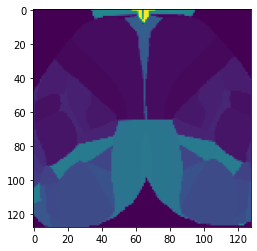

In [3]:
import numpy as np
import matplotlib.pyplot as plt
data= np.load('/media/cat/4TBSSD/yuki/maskwarp.npy')
print (data.shape)

plt.imshow(data)
plt.show()

In [4]:
data = np.load('/media/cat/4TBSSD/yuki/AQ2/tif_files/AQ2am_Apr29_Week8_30Hz/AQ2am_Apr29_Week8_30Hz_code_04_random_ROItimeCourses_15sec_pca_0.95.npy')
print (data.shape)
data2 = np.load('/media/cat/4TBSSD/yuki/AQ2/tif_files/AQ2am_Apr29_Week8_30Hz/AQ2am_Apr29_Week8_30Hz_code_04_trial_ROItimeCourses_15sec_pca_0.95.npy')
print (data2.shape)

(81, 5, 901)
(82, 5, 901)


In [20]:
data = np.load('/media/cat/4TBSSD/yuki/AQ2/SVM_Scores/SVM_Scores_AQ2am_Dec29_30Hz_code_04_trial_ROItimeCourses_15sec_pca_0.95.npy')
data.shape

(901, 10)

In [29]:
data = np.load('/media/cat/4TBSSD/yuki/first_decoding_time_all.npz', allow_pickle=True)
session_nos = data['all_session_nos']
session_nos


array([list([]), list([]), list([]), list([]), list([]),
       list([15, 17, 18, 19, 20, 27, 28, 29, 30, 32, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109])],
      dtype=object)

In [21]:
# load rnn
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

# 
rnn_dir = '/mnt/f418adc0-4ff9-410c-93c9-d6d21a1e9c35/yuki/IJ2/temp/rnn/'
svm_dir = '/mnt/f418adc0-4ff9-410c-93c9-d6d21a1e9c35/yuki/IJ2/temp/svm/'

# session:
session = 'Mar9_'

# 
data_rnn = np.load(glob.glob(rnn_dir+'/*'+session+"*.npz")[0])
b_rnn = data_rnn['b_rnn']
print ("rnn data: ", b_rnn.shape)

# load svm
data_svm = np.load(glob.glob(svm_dir+'/*'+session+"*.npy")[0])
data_svm = data_svm[:data_svm.shape[0]//2]
print ("svm data: ", data_svm.shape)

ax=plt.subplot(111)

# plot rnn
std = np.std(b_rnn,1)
mean = np.mean(b_rnn,1)
t=np.arange(b_rnn.shape[0])-9.5
plt.plot(t, mean, color='black')
ax.fill_between(t, mean-std, mean+std, color='black', alpha = 0.2)

# plot svm
std = np.std(data_svm,1)
mean = np.mean(data_svm,1)
t=np.arange(data_svm.shape[0])/30.-10
plt.plot(t, mean, color='blue')
ax.fill_between(t, mean-std, mean+std, color='blue', alpha = 0.2)

plt.xlim(-10,0)
plt.ylim(0.3, 1.0)
plt.show()


rnn data:  (10, 10)
svm data:  (300, 10)


In [113]:
data = np.load('/media/cat/4TBSSD/yuki/IJ2/concatenation_tests/IJ2pm_Feb29_30Hz_random.npy')
print (data.shape)

(93, 6, 900)


In [19]:
animals = ['IA1','IA2','IA3','IJ1','IJ2','AQ2']
root_dir = '/media/cat/4TBSSD/yuki/'
ctr=0
clrs=['black','blue','red','green','magenta','cyan']
for animal in animals:
    fnames = np.load('/media/cat/4TBSSD/yuki/'+animal+'/tif_files.npy')
    n = []
    for fname in fnames:
        session = os.path.split(fname)[1][:-4]
        try:
            data = np.loadtxt(root_dir+animal+'/tif_files/'+session+'/'+session+'_all_locs_selected.txt')
        except:
            continue
        n.append(len(data))

    median = np.mean(n)
    plt.plot([median,median],[0,25],'--',
             linewidth=3,
             c=clrs[ctr])

    #
    total_trials = np.sum(n)
    bins=np.arange(0,210,10)
    y = np.histogram(n, bins)
    plt.plot(y[1][:-1]+5, y[0],
             linewidth=4,
            label=animal+" - "+str(int(median)),
            c=clrs[ctr])
    
    ctr+=1
plt.xlim(bins[0],bins[-1])
plt.legend(fontsize=34)
plt.ylim(0,25)
plt.show()

<ipython-input-19-87f8513b13a3>:11: UserWarning: loadtxt: Empty input file: "/media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Apr4_30Hz/IA1pm_Apr4_30Hz_all_locs_selected.txt"
  data = np.loadtxt(root_dir+animal+'/tif_files/'+session+'/'+session+'_all_locs_selected.txt')
<ipython-input-19-87f8513b13a3>:11: UserWarning: loadtxt: Empty input file: "/media/cat/4TBSSD/yuki/IJ1/tif_files/IJ1pm_Apr7_30Hz/IJ1pm_Apr7_30Hz_all_locs_selected.txt"
  data = np.loadtxt(root_dir+animal+'/tif_files/'+session+'/'+session+'_all_locs_selected.txt')
<ipython-input-19-87f8513b13a3>:11: UserWarning: loadtxt: Empty input file: "/media/cat/4TBSSD/yuki/IJ2/tif_files/IJ2pm_Feb9_30Hz/IJ2pm_Feb9_30Hz_all_locs_selected.txt"
  data = np.loadtxt(root_dir+animal+'/tif_files/'+session+'/'+session+'_all_locs_selected.txt')
<ipython-input-19-87f8513b13a3>:11: UserWarning: loadtxt: Empty input file: "/media/cat/4TBSSD/yuki/IJ2/tif_files/IJ2pm_Feb15_30Hz/IJ2pm_Feb15_30Hz_all_locs_selected.txt"
  data = np.loadtxt(root_dir+anima

In [33]:
data = np.load('/media/cat/4TBSSD/yuki/IA1/SVM_Scores/SVM_Scores_IA1pm_Mar2_30Hzcode_04_trial_ROItimeCourses_30sec_Xvalid10_Slidewindow30.npz')
acc = data['accuracy']
print (acc.shape)

(1771, 10)


In [156]:

print (len(cors))

3


In [18]:
data = np.load('/media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Apr21_30Hz/correlate.npz')
cors = data['cors']

# 
fig=plt.figure()
name = ['left_paw','right_paw','lever']
t=np.arange(-15000,15000,1)/1000
for k in range(3):
    temp = cors[k]
    plt.plot(t,temp/np.max(temp),label=name[k])
plt.legend()


plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Apr21_30Hz/correlate.npz'

In [2]:
d = np.load('/media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb12_30Hz/IA1pm_Feb12_30Hz_3secNoMove_movements.npz',allow_pickle=True)

quiet = d['all_quiescent']
print (quiet[:10])
print ('')

features = d['feature_quiescent']
for k in range(len(features)):
    print (k,features[k][:10])
    print ('')

#all_movs = d['all_feature_movements']
#print (all_movs)

[[ 38.6         41.73333333]
 [ 68.93333333  72.13333333]
 [ 84.86666667  90.4       ]
 [139.73333333 144.46666667]
 [152.06666667 156.33333333]
 [159.93333333 163.93333333]
 [170.         174.13333333]
 [216.2        221.93333333]
 [231.8        235.6       ]
 [244.26666667 248.2       ]]

0 [[17.733333333333334, 34.2], [34.4, 72.86666666666666], [73.8, 77.13333333333334], [77.13333333333334, 92.86666666666666], [93.06666666666666, 104.06666666666666], [104.53333333333333, 126.53333333333333], [126.66666666666667, 135.06666666666666], [136.26666666666668, 169.46666666666667], [169.73333333333332, 182.46666666666667], [183.33333333333334, 198.6]]

1 [[0.3333333333333333, 13.6], [16.133333333333333, 34.46666666666667], [35.266666666666666, 42.53333333333333], [42.53333333333333, 72.4], [72.4, 104.66666666666667], [104.8, 126.46666666666667], [126.73333333333333, 180.53333333333333], [182.93333333333334, 199.0], [209.86666666666667, 215.66666666666666], [215.8, 222.33333333333334]]

2 [[